# Sberbank Project

### 산경과 12학번 금승도, 이덕상

In [74]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time
import datetime
from sklearn import linear_model
from sklearn.cross_validation import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler  
from sklearn import neural_network
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import RandomizedLasso
from sklearn.neural_network import MLPRegressor
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

### property data

In [88]:
df = pd.read_csv('train.csv')
print df.shape
macro = pd.read_csv('macro.csv')
macro = macro.set_index('timestamp')
df = df.join(macro, on='timestamp')
df.head()

(30471, 292)


,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0


* Counts of null value in each columns

In [3]:
null_count_list = df.isnull().sum().tolist()
column_list = df.columns.values.tolist()
null_column_check = pd.DataFrame({'column': column_list, 'null_count': null_count_list})
null_column_check = null_column_check[null_column_check['null_count'] > 0]
null_column_check.sort_values('null_count', ascending = False)

,column,null_count
381,provision_retail_space_modern_sqm,29718
380,provision_retail_space_sqm,24879
388,students_reg_sports_share,16901
383,theaters_viewers_per_1000_cap,16901
368,load_of_teachers_preschool_per_teacher,16901
385,museum_visitis_per_100_cap,16901
24,hospital_beds_raion,14441
7,build_year,13605
10,state,13559
162,cafe_avg_price_500,13281


* categorical value를 int 형 value로 변환하였다.

product_type, sub_area, culture_objects_top_25, thermal_power_plant_raion, incineration_raion, oil_chemistry_raion, radiation_raion, railroad_terminal_raion, big_market_raion, nuclear_reactor_raion, detention_facility_raion, water_1line, big_road1_1line, railroad_1line
은 categorical type

In [4]:
df.groupby('product_type').count()['id']

product_type
Investment       19448
OwnerOccupier    11023
Name: id, dtype: int64

In [5]:
sub_area_list = df.groupby('sub_area').groups.keys()
sub_area_code_list = np.arange(1,len(sub_area_list) + 1)
sub_area_code = pd.DataFrame({'sub_area': sub_area_list, 'sub_area_code': sub_area_code_list})
sub_area_code = sub_area_code.set_index('sub_area')
ecology_list = df.groupby('ecology').groups.keys()
ecology_code_list = np.arange(1,len(ecology_list) + 1)
ecology_code = pd.DataFrame({'ecology': ecology_list, 'ecology_code': ecology_code_list})
ecology_code = ecology_code.set_index('ecology')

df = df.join(sub_area_code, on='sub_area')
df = df.join(ecology_code, on='ecology')

In [6]:
print(df.groupby('culture_objects_top_25').count()['id'])
print(df.groupby('thermal_power_plant_raion').count()['id'])
print(df.groupby('incineration_raion').count()['id'])
print(df.groupby('oil_chemistry_raion').count()['id'])
print(df.groupby('radiation_raion').count()['id'])
print(df.groupby('railroad_terminal_raion').count()['id'])
print(df.groupby('big_market_raion').count()['id'])
print(df.groupby('nuclear_reactor_raion').count()['id'])
print(df.groupby('detention_facility_raion').count()['id'])
print(df.groupby('water_1line').count()['id'])
print(df.groupby('big_road1_1line').count()['id'])
print(df.groupby('railroad_1line').count()['id'])

culture_objects_top_25
no     28543
yes     1928
Name: id, dtype: int64
thermal_power_plant_raion
no     28817
yes     1654
Name: id, dtype: int64
incineration_raion
no     28155
yes     2316
Name: id, dtype: int64
oil_chemistry_raion
no     30175
yes      296
Name: id, dtype: int64
radiation_raion
no     19600
yes    10871
Name: id, dtype: int64
railroad_terminal_raion
no     29335
yes     1136
Name: id, dtype: int64
big_market_raion
no     27649
yes     2822
Name: id, dtype: int64
nuclear_reactor_raion
no     29608
yes      863
Name: id, dtype: int64
detention_facility_raion
no     27427
yes     3044
Name: id, dtype: int64
water_1line
no     28134
yes     2337
Name: id, dtype: int64
big_road1_1line
no     29690
yes      781
Name: id, dtype: int64
railroad_1line
no     29578
yes      893
Name: id, dtype: int64


모든 categorical type value로 이상한 value가 들어가지 않은 것으로 확인됨




* caterogical value를 숫자로 변환 (no: 0, yes: 1)

In [7]:
df_revised = df.copy()
df_revised['product_type'] = df_revised['product_type'].eq('OwnerOccupier').mul(1)
df_revised['culture_objects_top_25'] = df_revised['culture_objects_top_25'].eq('yes').mul(1)
df_revised['thermal_power_plant_raion'] = df_revised['thermal_power_plant_raion'].eq('yes').mul(1)
df_revised['incineration_raion'] = df_revised['incineration_raion'].eq('yes').mul(1)
df_revised['oil_chemistry_raion'] = df_revised['oil_chemistry_raion'].eq('yes').mul(1)
df_revised['radiation_raion'] = df_revised['radiation_raion'].eq('yes').mul(1)
df_revised['railroad_terminal_raion'] = df_revised['railroad_terminal_raion'].eq('yes').mul(1)
df_revised['big_market_raion'] = df_revised['big_market_raion'].eq('yes').mul(1)
df_revised['nuclear_reactor_raion'] = df_revised['nuclear_reactor_raion'].eq('yes').mul(1)
df_revised['detention_facility_raion'] = df_revised['detention_facility_raion'].eq('yes').mul(1)
df_revised['water_1line'] = df_revised['water_1line'].eq('yes').mul(1)
df_revised['big_road1_1line'] = df_revised['big_road1_1line'].eq('yes').mul(1)
df_revised['railroad_1line'] = df_revised['railroad_1line'].eq('yes').mul(1)

* timestamp의 형식을 바꿨다.

In [9]:
df_revised['timestamp_r'] = df_revised['timestamp'].apply(lambda x: time.mktime(datetime.datetime.strptime(x, '%Y-%m-%d').timetuple()))

* 여러 column을 하나로 합쳤다.

In [10]:
# distance_ratio = {
#     '500': 1,
#     '1000': 1/4,
#     '1500': 1/9,
#     '2000': 1/16,
#     '2500': 1/25,
#     '3000': 1/36,
#     '3500': 1/49,
#     '4000': 1/64,
#     '4500': 1/81,
#     '5000': 1/100
# }
distance_ratio = {
    '500': 1,
    '1000': 0.9,
    '1500': 0.8,
    '2000': 0.7,
    '2500': 0.6,
    '3000': 0.5,
    '3500': 0.4,
    '4000': 0.3,
    '4500': 0.2,
    '5000': 0.1
}

In [11]:
df_revised['cafe_count_calibration'] = df_revised['cafe_count_500'] * distance_ratio['500'] + \
df_revised['cafe_count_1000'] * distance_ratio['1000'] + \
df_revised['cafe_count_1500'] * distance_ratio['1500'] + \
df_revised['cafe_count_2000'] * distance_ratio['2000'] + \
df_revised['cafe_count_3000'] * distance_ratio['3000'] + \
df_revised['cafe_count_5000'] * distance_ratio['5000']

* 여러개의 office count column을 하나의 column으로 합쳤다.

In [12]:
df_revised['office_count_calibration'] = df_revised['office_count_500'] * distance_ratio['500'] + \
df_revised['office_count_1000'] * distance_ratio['1000'] + \
df_revised['office_count_1500'] * distance_ratio['1500'] + \
df_revised['office_count_2000'] * distance_ratio['2000'] + \
df_revised['office_count_3000'] * distance_ratio['3000'] + \
df_revised['office_count_5000'] * distance_ratio['5000']
# df_revised[['office_count_calibration', 'office_count_1000', 'office_count_1500', 'office_count_2000', 'office_count_3000', 'office_count_5000']]

* 여러개의 trc(shopping mall) column을 하나의 column으로 합쳤다.

In [13]:
df_revised['trc_count_calibration'] = df_revised['trc_count_500'] * distance_ratio['500'] + \
df_revised['trc_count_1000'] * distance_ratio['1000'] + \
df_revised['trc_count_1500'] * distance_ratio['1500'] + \
df_revised['trc_count_2000'] * distance_ratio['2000'] + \
df_revised['trc_count_3000'] * distance_ratio['3000'] + \
df_revised['trc_count_5000'] * distance_ratio['5000']
# df_revised[['trc_count_calibration', 'trc_count_500', 'trc_count_1000', 'trc_count_1500', 'trc_count_2000', 'trc_count_3000', 'trc_count_5000']]

* 여러개의 big church column을 하나의 column으로 합쳤다.

In [14]:
df_revised['big_church_count_calibration'] = df_revised['big_church_count_500'] * distance_ratio['500'] + \
df_revised['big_church_count_1000'] * distance_ratio['1000'] + \
df_revised['big_church_count_1500'] * distance_ratio['1500'] + \
df_revised['big_church_count_2000'] * distance_ratio['2000'] + \
df_revised['big_church_count_3000'] * distance_ratio['3000'] + \
df_revised['big_church_count_5000'] * distance_ratio['5000']
# df_revised[['big_church_count_calibration', 'big_church_count_500', 'big_church_count_1000', 'big_church_count_1500', 'big_church_count_2000', 'big_church_count_3000', 'big_church_count_5000']]

* 여러개의 church column을 하나의 column으로 합쳤다.

In [15]:
df_revised['church_count_calibration'] = df_revised['church_count_500'] * distance_ratio['500'] + \
df_revised['church_count_1000'] * distance_ratio['1000'] + \
df_revised['church_count_1500'] * distance_ratio['1500'] + \
df_revised['church_count_2000'] * distance_ratio['2000'] + \
df_revised['church_count_3000'] * distance_ratio['3000'] + \
df_revised['church_count_5000'] * distance_ratio['5000']
# df_revised[['church_count_calibration', 'church_count_500', 'church_count_1000', 'church_count_1500', 'church_count_2000', 'church_count_3000', 'church_count_5000']]

* 여러개의 mosque column을 하나의 column으로 합쳤다.

In [16]:
df_revised['mosque_count_calibration'] = df_revised['mosque_count_500'] * distance_ratio['500'] + \
df_revised['mosque_count_1000'] * distance_ratio['1000'] + \
df_revised['mosque_count_1500'] * distance_ratio['1500'] + \
df_revised['mosque_count_2000'] * distance_ratio['2000'] + \
df_revised['mosque_count_3000'] * distance_ratio['3000'] + \
df_revised['mosque_count_5000'] * distance_ratio['5000']
# df_revised[['church_count_calibration', 'church_count_500', 'church_count_1000', 'church_count_1500', 'church_count_2000', 'church_count_3000', 'church_count_5000']]

* 여러개의 leisure column을 하나의 column으로 합쳤다.

In [17]:
df_revised['leisure_count_calibration'] = df_revised['leisure_count_500'] * distance_ratio['500'] + \
df_revised['leisure_count_1000'] * distance_ratio['1000'] + \
df_revised['leisure_count_1500'] * distance_ratio['1500'] + \
df_revised['leisure_count_2000'] * distance_ratio['2000'] + \
df_revised['leisure_count_3000'] * distance_ratio['3000'] + \
df_revised['leisure_count_5000'] * distance_ratio['5000']
# df_revised[['church_count_calibration', 'church_count_500', 'church_count_1000', 'church_count_1500', 'church_count_2000', 'church_count_3000', 'church_count_5000']]

* 여러개의 sport column을 하나의 column으로 합쳤다.

In [18]:
df_revised['sport_count_calibration'] = df_revised['sport_count_500'] * distance_ratio['500'] + \
df_revised['sport_count_1000'] * distance_ratio['1000'] + \
df_revised['sport_count_1500'] * distance_ratio['1500'] + \
df_revised['sport_count_2000'] * distance_ratio['2000'] + \
df_revised['sport_count_3000'] * distance_ratio['3000'] + \
df_revised['sport_count_5000'] * distance_ratio['5000']
# df_revised[['church_count_calibration', 'church_count_500', 'church_count_1000', 'church_count_1500', 'church_count_2000', 'church_count_3000', 'church_count_5000']]

* 여러개의 market column을 하나의 column으로 합쳤다.

In [19]:
df_revised['market_count_calibration'] = df_revised['market_count_500'] * distance_ratio['500'] + \
df_revised['market_count_1000'] * distance_ratio['1000'] + \
df_revised['market_count_1500'] * distance_ratio['1500'] + \
df_revised['market_count_2000'] * distance_ratio['2000'] + \
df_revised['market_count_3000'] * distance_ratio['3000'] + \
df_revised['market_count_5000'] * distance_ratio['5000']
# df_revised[['market_count_calibration', 'market_count_500', 'market_count_1000', 'market_count_1500', 'market_count_2000', 'market_count_3000', 'market_count_5000']]

* 여러개의 cafe avg price column을 하나의 column으로 합쳤다.

In [20]:
df_revised['cafe_avg_price_calibration'] = df_revised['cafe_avg_price_500'] * distance_ratio['500'] + \
df_revised['cafe_avg_price_500'] * distance_ratio['1000'] + \
df_revised['cafe_avg_price_1000'] * distance_ratio['1500'] + \
df_revised['cafe_avg_price_2000'] * distance_ratio['2000'] + \
df_revised['cafe_avg_price_3000'] * distance_ratio['3000'] + \
df_revised['cafe_avg_price_5000'] * distance_ratio['5000']

* green part column과 prom part을 하나로 합쳤다.

In [21]:
df_revised['green_part_calibration'] = df_revised['green_part_500'] * distance_ratio['500'] + \
df_revised['green_part_1000'] * distance_ratio['1000'] + \
df_revised['green_part_1500'] * distance_ratio['1500'] + \
df_revised['green_part_2000'] * distance_ratio['2000'] + \
df_revised['green_part_3000'] * distance_ratio['3000'] + \
df_revised['green_part_5000'] * distance_ratio['5000']

df_revised['prom_part_5000'] = df_revised['prom_part_5000'].fillna(0)
df_revised['prom_part_calibration'] = df_revised['prom_part_500'] * distance_ratio['500'] + \
df_revised['prom_part_1000'] * distance_ratio['1000'] + \
df_revised['prom_part_1500'] * distance_ratio['1500'] + \
df_revised['prom_part_2000'] * distance_ratio['2000'] + \
df_revised['prom_part_3000'] * distance_ratio['3000'] + \
df_revised['prom_part_5000'] * distance_ratio['5000']

In [22]:
df_revised['count_all'] = df_revised['cafe_count_calibration'] + \
df_revised['office_count_calibration'] + df_revised['trc_count_calibration'] + \
df_revised['big_church_count_calibration'] + df_revised['church_count_calibration'] + \
df_revised['mosque_count_calibration'] + df_revised['leisure_count_calibration'] + \
df_revised['sport_count_calibration'] + df_revised['market_count_calibration']

### Outliers 제거 및 Missing value 처리

* price_doc outliers 구분

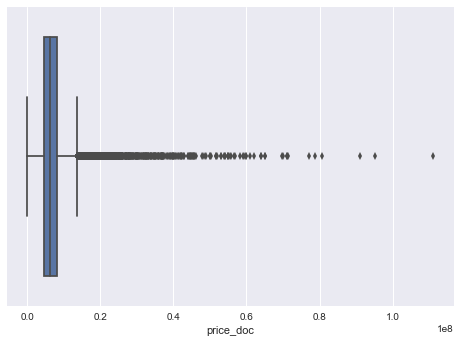

In [23]:
sns.boxplot(df['price_doc'])
plt.show()

In [24]:
df_revised = df_revised[df_revised['price_doc'] != 111111112]

* state의 경우 value가 33인 경우가 존재한다. state의 경우 집의 등급을 매긴 것이고, 3을 33이라고 잘못 기입한 것으로 판단 3으로 수정하였다.

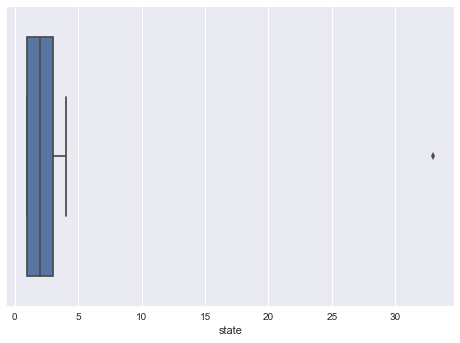

In [25]:
sns.boxplot(df_revised['state'])
plt.show()

In [26]:
print(df_revised.groupby('state').count()['id'])
df_revised.loc[df_revised['state'] == 33, 'state'] = 3

state
1.0     4855
2.0     5844
3.0     5790
4.0      422
33.0       1
Name: id, dtype: int64


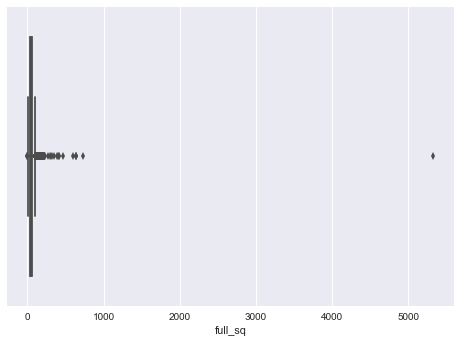

In [27]:
sns.boxplot(df_revised['full_sq'])
plt.show()

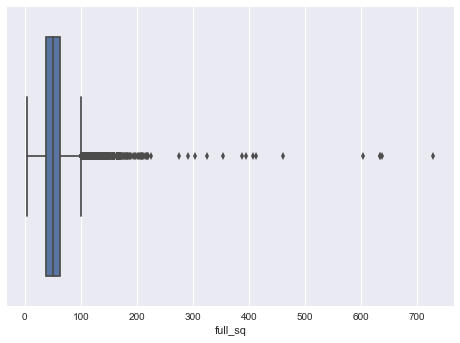

In [28]:
df_revised = df_revised[df_revised['full_sq'] < 4000]
df_revised = df_revised[df_revised['full_sq'] != 0]
df_revised = df_revised[df_revised['full_sq'] != 1]
sns.boxplot(df_revised['full_sq'])
plt.show()

In [29]:
# df_revised = df_revised[df_revised['life_sq'] > df_revised['full_sq']]['life_sq'] = df_revised[df_revised['life_sq'] > df_revised['full_sq']]['full_sq']

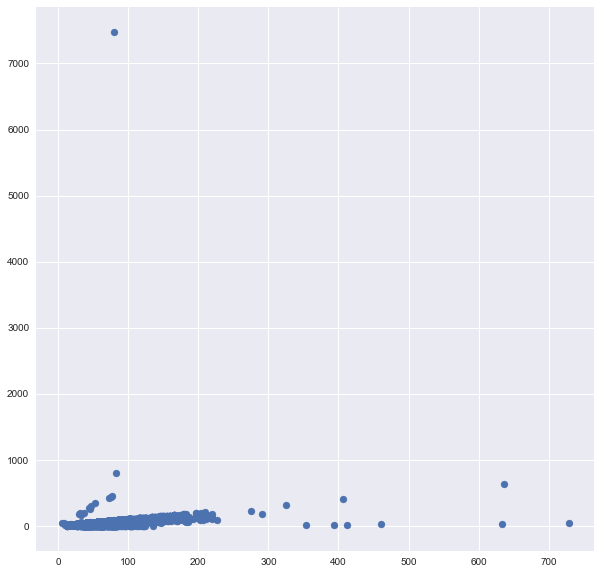

In [30]:
df_fullsq_lifesq = df_revised[['full_sq', 'life_sq']]
plt.figure(figsize=(10,10))
plt.scatter(df_fullsq_lifesq['full_sq'].tolist(), df_fullsq_lifesq['life_sq'].tolist())
plt.show()

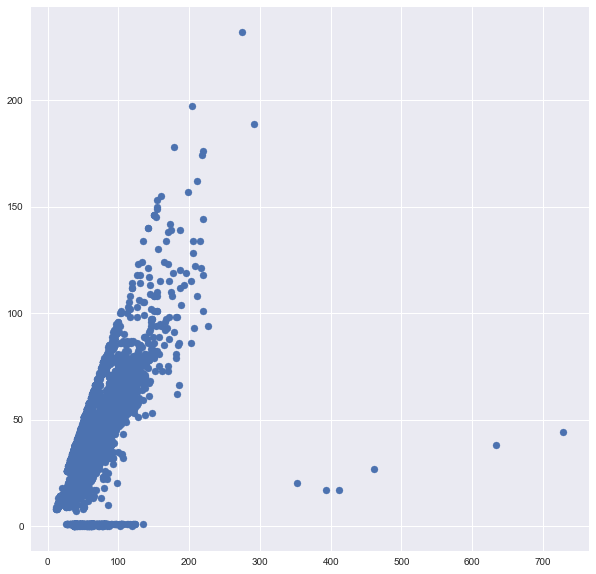

In [31]:
df_fullsq_lifesq = df_revised[['full_sq', 'life_sq']]
df_fullsq_lifesq = df_fullsq_lifesq[df_fullsq_lifesq['life_sq'] < df_fullsq_lifesq['full_sq']]
plt.figure(figsize=(10,10))
plt.scatter(df_fullsq_lifesq['full_sq'].tolist(), df_fullsq_lifesq['life_sq'].tolist())
plt.show()

In [32]:
from sklearn import linear_model

data = df_revised[['full_sq', 'life_sq']].dropna()
X_mat = data['full_sq'].as_matrix()
Y_mat = data['life_sq'].as_matrix()
X_mat = X_mat.reshape(-1,1)
Y_mat = Y_mat.reshape(-1,1)
reg = linear_model.LinearRegression()
reg.fit(X_mat, Y_mat)

/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
predict = reg.predict(df_revised[df_revised['life_sq'].isnull()]['full_sq'].as_matrix().reshape(-1,1))
predict
predict = np.round(predict)
df_revised.loc[df_revised['life_sq'].isnull(), 'life_sq'] = predict

In [34]:
df_revised['sq_diff'] = df_revised['full_sq'] - df_revised['life_sq']
df_revised = df_revised[df_revised['life_sq'] <= df_revised['full_sq']]

* build year의 경우 20052009가 존재한다. 이를 2009로 수정하였다.

In [35]:
df_revised.loc[df_revised['build_year'] == 20052009, 'build_year'] = 2009

### 가격 별 평균

In [71]:
df_revised_bin = []
D_NUM = 1000000
BIN_MAX = 17
for i in range(1,BIN_MAX):
    df_revised_bin.append(df_revised[(df_revised['price_doc'] <= i * D_NUM) & (df_revised['price_doc'] > (i - 1) * D_NUM)])

df_revised_bin.append(df_revised[df_revised['price_doc'] > BIN_MAX * D_NUM])
bin_data = pd.DataFrame()
for i in range(0,BIN_MAX):
    temp = df_revised_bin[i].mean()
    temp['row_count'] = len(df_revised_bin[i].index)
    bin_data[i] = temp
    
bin_data = bin_data.transpose()
bin_data.to_csv('bin_data_mean_count.csv')

In [78]:
cluster_columns = ['full_sq', 'floor', 'product_type']

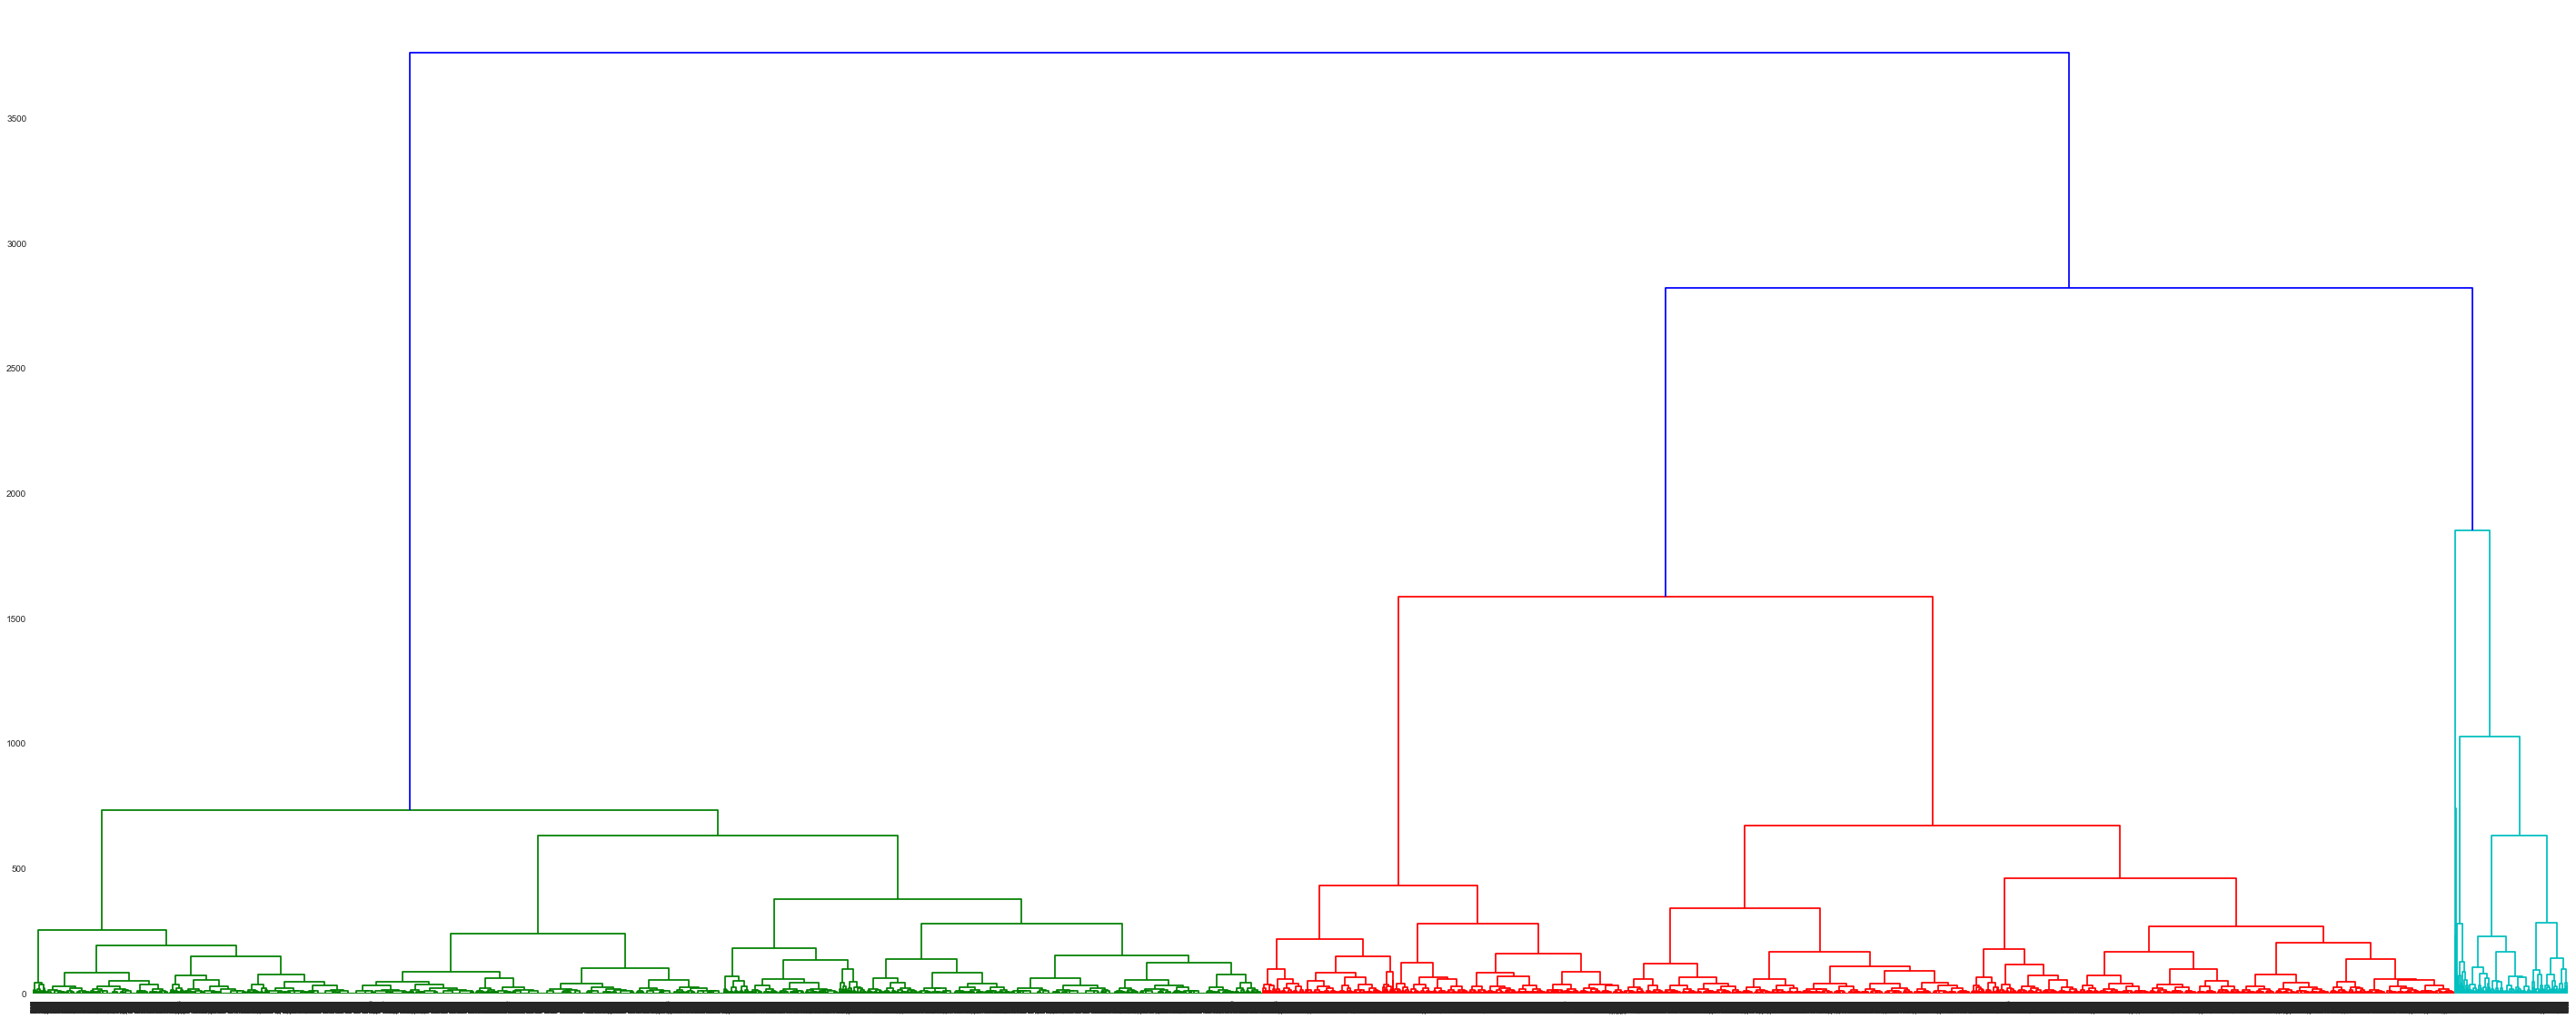

In [81]:
cluster_data = df_revised[cluster_columns].dropna()
row_clusters = linkage(cluster_data[cluster_columns].values, method='ward', metric='euclidean')
plt.figure(figsize=(50,20))
row_dendr = dendrogram(row_clusters)
plt.show()

In [84]:
cluster_columns = ['full_sq', 'preschool_quota', 'office_raion', 'build_count_wood', 'build_count_brick', 'build_count_before_1920', 'build_count_1971-1995',
                  'metro_min_walk', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km', 'kremlin_km', 'cafe_count_calibration', 'sq_diff']

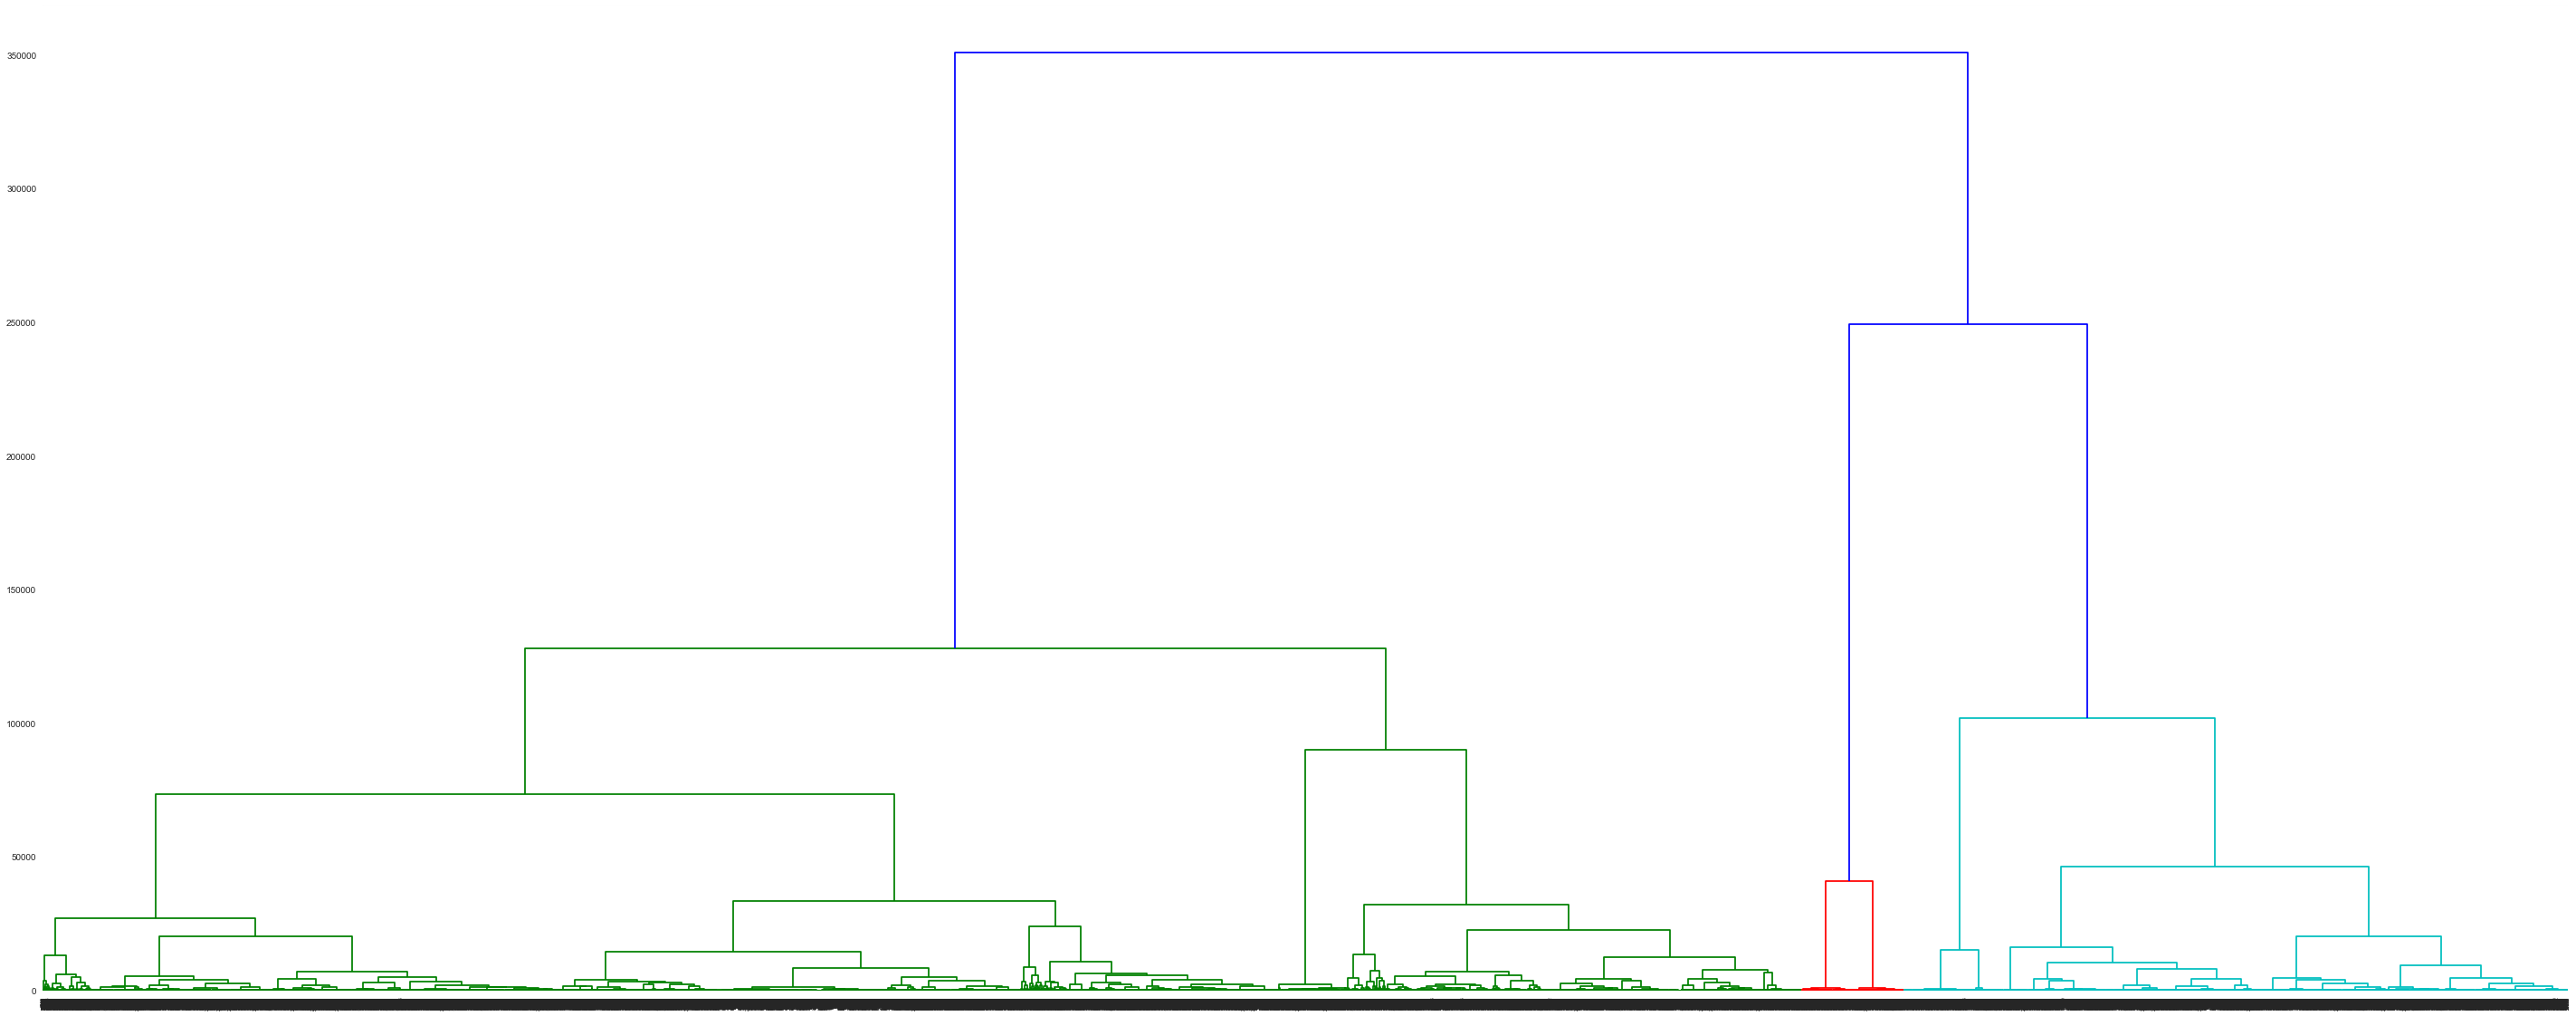

In [87]:
cluster_data = df_revised[cluster_columns].dropna()
# cluster_data.shape
row_clusters = linkage(cluster_data[cluster_columns].values, method='ward', metric='euclidean')
plt.figure(figsize=(50,20))
row_dendr = dendrogram(row_clusters)
plt.show()

## Set을 나누기

In [ ]:
df_revised_1 = df_revised[df_revised['price_doc'] <= 3000000]
df_revised_2 = df_revised[df_revised['price_doc'] >= 3000000]
# df_revised_3 = df_revised[df_revised['price_doc'] > 12000000]

In [ ]:
df_price_1000000 = df_revised[df_revised['price_doc']]

In [ ]:
mean1 = df_revised_1.mean()
mean2 = df_revised_2.mean()

In [ ]:
mean_compare = pd.DataFrame()
mean_compare['mean1'] = mean1
mean_compare['mean2'] = mean2

In [ ]:
mean_compare['mean1'] = mean_compare['mean1'].apply('{0:.0f}'.format)
mean_compare['mean2'] = mean_compare['mean2'].apply('{0:.0f}'.format)
mean_compare

In [ ]:
df_revised['cafe_count_calibration']

## 부동산의 순수한 attribute 사이의 pair plot

In [ ]:
# cols = ['full_sq', 'life_sq', 'floor', 'max_floor', 'build_year', 'num_room', 'kitch_sq', 'state', 'price_doc']
# sns.pairplot(df_revised[cols], dropna=True)
# plt.show()

In [ ]:
df_copyed_1 = df_revised.copy()

In [ ]:
# df_copyed_1.boxplot('full_sq')
# df_copyed_1.boxplot('price_doc')
# plt.show()

In [ ]:
cols_sq = ['price_doc', 'full_sq', 'life_sq', 'sq_diff']
sns.pairplot(df_copyed_1[cols_sq], size=2.5)
plt.show()

In [ ]:
df_revised = df_revised[df_revised['price_doc'] < 100000000]

In [ ]:
cm = np.corrcoef(df_copyed_1[cols_sq].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols_sq,
                 xticklabels=cols_sq)
plt.show()

## 부동산의 근처 attribute 사이의 pair plot 및 heatmap

### cafe avg price

In [ ]:
df_copyed_price = df_revised.copy()
cols = ['price_doc', 'cafe_avg_price_calibration', 'cafe_avg_price_500', 'cafe_avg_price_1000', 'cafe_avg_price_1500', 'cafe_avg_price_2000', 'cafe_avg_price_3000', 'cafe_avg_price_5000']
df_copyed_price = df_copyed_price[cols].dropna()
sns.pairplot(df_copyed_price[cols], size=2.5)
plt.show()

In [ ]:
import numpy as np
cm = np.corrcoef(df_copyed_price[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)
plt.show()

### count calibration

In [ ]:
cols = ['price_doc', 'cafe_count_calibration', 'office_count_calibration', 'trc_count_calibration', 'big_church_count_calibration', 'church_count_calibration', 'mosque_count_calibration', 'leisure_count_calibration', 'sport_count_calibration', 'market_count_calibration']
sns.pairplot(df_revised[cols])
plt.show()

* calibration 값 사이의 heatmap을 그려보았다.

In [ ]:
cm = np.corrcoef(df_revised[cols].values.T)
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 15},
                yticklabels=cols,
                xticklabels=cols)
# plt.tight_layout()
plt.show()

### green part, prom part

In [ ]:
cols = ['price_doc', 'green_part_calibration', 'prom_part_calibration']
sns.pairplot(df_revised[cols])
plt.show()

In [ ]:
cm = np.corrcoef(df_revised[cols].values.T)
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 15},
                yticklabels=cols,
                xticklabels=cols)
plt.show()

### Metro

In [ ]:
df_copyed_2 = df_revised.copy()
cols_2 = ['price_doc', 'metro_min_avto', 'metro_km_avto', 'metro_min_walk', 'metro_km_walk']
df_copyed_2 = df_copyed_2[cols_2].dropna()
sns.pairplot(df_copyed_2[cols_2], size=2.5)
# df_copyed_2 = df_copyed_2[df_copyed_2['metro_km_walk'] < 15]
plt.show()

In [ ]:
cm = np.corrcoef(df_copyed_2[cols_2].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols_2,
                 xticklabels=cols_2)
plt.tight_layout()
plt.show()

### Near service distance 1

In [ ]:
df_copyed_3 = df_revised.copy()
# df_copyed_3 = df_copyed_3[df_copyed_3['metro_km_walk'] < 3]
cols_3 = ['price_doc', 'big_church_km', 'big_market_km', 'kindergarten_km', 'market_shop_km', 'mosque_km', 'park_km', 'preschool_km', 'public_healthcare_km', 'school_km', 'shopping_centers_km', 'railroad_station_walk_km', 'metro_km_walk']
df_copyed_3 = df_copyed_3[cols_3].dropna()
sns.pairplot(df_copyed_3[cols_3], size=2.5)
plt.show()

In [ ]:
cm = np.corrcoef(df_copyed_3[cols_3].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=cols_3,
                 xticklabels=cols_3)
plt.show()

### Near service distance 2

In [ ]:
df_copyed_3 = df_revised.copy()
# df_copyed_3 = df_copyed_3[df_copyed_3['fitness_km'] < 5]
cols_3 = ['price_doc', 'additional_education_km', 'big_road1_km', 'big_road2_km', 'fitness_km', 'green_zone_km', 'incineration_km', 'nuclear_reactor_km', 'oil_chemistry_km']
df_copyed_3 = df_copyed_3[cols_3].dropna()
sns.pairplot(df_copyed_3[cols_3], size=2.5)
plt.tight_layout()
plt.show()

In [ ]:
cm = np.corrcoef(df_copyed_3[cols_3].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=cols_3,
                 xticklabels=cols_3)
plt.tight_layout()
plt.show()

### Demographic features

In [ ]:
df_copyed_4 = df_revised.copy()
cols_4 = ['price_doc', 'young_male', 'young_female', 'work_male', 'work_female', 'ekder_male', 'ekder_female']
df_copyed_4 = df_copyed_4[cols_4].dropna()
sns.pairplot(df_copyed_4[cols_4], size=2.5)
plt.tight_layout()
plt.show()

In [ ]:
cm = np.corrcoef(df_copyed_4[cols_4].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=cols_4,
                 xticklabels=cols_4)
plt.tight_layout()
plt.show()

### Age features

In [ ]:
df_copyed_5 = df_revised.copy()
# df_copyed_5 = df_copyed_5[df_copyed_5['16_29_male'] < 50000]
cols_5 = ['price_doc', '0_6_male', '0_6_female', '7_14_male', '7_14_female', '16_29_male', '16_29_female']
df_copyed_5 = df_copyed_5[cols_5].dropna()
sns.pairplot(df_copyed_5[cols_5], size=2.5)
plt.show()

In [ ]:
cm = np.corrcoef(df_copyed_5[cols_5].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=cols_5,
                 xticklabels=cols_5)
plt.tight_layout()
plt.show()

## Subarea attribute 별 pairplot과 heatmap

In [ ]:
df_copyed_6 = df_revised.copy()
# df_copyed_6 = df_copyed_6[df_copyed_6['build_count_after_1995'] < 100]
# df_copyed_6 = df_copyed_6[df_copyed_6['build_count_before_1920'] == 0]
cols_6 = ['price_doc', 'build_count_before_1920', 'build_count_1921-1945', 'build_count_1946-1970', 'build_count_1971-1995', 'build_count_after_1995']
df_copyed_6 = df_copyed_6[cols_6].dropna()
sns.pairplot(df_copyed_6[cols_6], size=2.5)
plt.show()

In [ ]:
cm = np.corrcoef(df_copyed_6[cols_6].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=cols_6,
                 xticklabels=cols_6)
plt.show()

---

## Prediction (Model을 이용해 부동산 가격을 예측해보자)

In [52]:
def get_data (features):
    selected_features = features
    selected_features.append('price_doc')
    
#     null_columns = null_column_check[null_column_check['null_count'] > 3000]
#     for null_column in null_columns['column']:
#         if null_column in selected_features:
#             selected_features.remove(null_column)
        
    df_fit = df_revised.copy()
    df_fit_X = df_fit[selected_features].dropna()
    df_fit_Y = df_fit_X['price_doc']
    df_fit_X = df_fit_X.drop('price_doc', 1)
    
    X_mat = df_fit_X.as_matrix()
    Y_mat = df_fit_Y.tolist()
    selected_features = selected_features[0:len(selected_features) - 1]
    
    return X_mat, Y_mat, selected_features

In [53]:
n_folds = 10
# df_revised = df_revised_1
# selected_features = [
#     'full_sq',
# #     'cafe_count_5000_price_2500',
# #     'cafe_count_5000_price_4000',
#     'cafe_count_calibration',
# #     'build_year',
#     'count_all',
#     'ttk_km',
#     'sadovoe_km',
#     'bulvar_ring_km',
#     'kremlin_km',
#     'metro_km_walk',
#     'big_road1_km',
#     'theater_km',
# #     'raion_popul_by_area_m',
# #     'sq_diff',
# #     'code',
#     'raion_popul',
#     'green_zone_part',
#     'indust_part',
# #     'timestamp_r',
# #     'num_room',
# #     'ecology_code',
#     'product_type',
# #     'state',
#     'price_doc'
# ]

# selected_features = [
#     'num_room',
# 'full_sq',
# # 'sport_count_5000',
# 'trc_count_5000',
# 'office_sqm_5000',
# 'trc_sqm_5000',
# 'sport_objects_raion',
# 'cafe_count_5000_price_1000',
# # 'cafe_count_calibration',
# # 'count_all',
# 'office_count_5000',
# 'metro_min_avto',
# 'big_church_km',
# 'office_km',
# 'nuclear_reactor_km',
# 'ttk_km',
# 'zd_vokzaly_avto_km',
# # 'code',
# 'price_doc'

# ]

# selected_features = df_revised.columns.values
# null_column_check_temp = null_column_check[null_column_check['null_count'] > 3200]
# for column in null_column_check_temp['column']:
#     selected_features = selected_features[selected_features != column]
# features = ['swim_pool_km', 'timestamp_r', 'public_transport_station_km',
#     'kindergarten_km', 'cafe_count_5000_price_2500', 'full_sq', 'office_sqm_5000', 'ttk_km',
#     'culture_objects_top_25', 'balance_trade_growth', 'cafe_count_1500_price_high',
#     'power_transmission_line_km', 'big_road1_km', 'cafe_count_1500_price_1500', 'trc_sqm_3000', 'cafe_count_3000_price_1000',
#            'young_female', 'apartment_fund_sqm', 'product_type', 'ID_metro', 'ttk_km', 'floor', 'railroad_km', 'prom_part_5000',
#             'metro_min_avto','thermal_power_plant_km','mosque_count_3000','green_part_5000','leisure_count_3000',
#     'children_preschool','indust_part','green_zone_part','raion_popul','area_m', 'bulvar_ring_km', 'kremlin_km', 'cafe_count_calibration']
features = ['office_sqm_5000',
'full_sq',
'cafe_count_5000_price_2500',
'cafe_count_calibration',
'railroad_km',
'ttk_km',
'sadovoe_km',
'mkad_km',
'bulvar_ring_km',
'swim_pool_km',
'kremlin_km',
'cafe_count_1500_price_1500',
'public_transport_station_km',
'timestamp_r',
'green_part_5000',
'metro_min_avto',
'kindergarten_km',
'raion_popul',
'floor',
'apartment_fund_sqm',
'ID_metro',
'culture_objects_top_25',
           'build_year',
           'kitch_sq',
           'raion_popul',
           'preschool_quota',
           'office_raion',
            'male_f',
            'female_f',
            'work_male',
            'work_female',
            '16_29_male',
            'build_count_wood',
            'raion_build_count_with_material_info',
            'build_count_panel',
            'build_count_brick',
           'full_all',
            'num_room',
            'gdp_annual',
           'sq_diff']
# features = df_revised.columns.values.tolist()
# features = features[0:len(features) - 1]
# features.remove('id')
# features.remove('sub_area')
# features.remove('ecology')
# features.remove('timestamp')
# features.remove('price_doc')
X_mat, Y_mat, selected_features = get_data(features)

In [54]:
len(X_mat)

14704

### Variable selection

#### * KBest 50개

#### f_regression

In [ ]:
KBest = SelectKBest(f_regression, k=50)
X_kbest_f_50 = KBest.fit_transform(X_mat, Y_mat)
test = pd.DataFrame()
test['column'] = selected_features[0:len(selected_features) - 1]
test['score'] = KBest.scores_
# test.sort_values('score', ascending=False).to_csv('kbest_f_selection.csv')

#### mutual_info_regression

In [ ]:
KBest = SelectKBest(mutual_info_regression, k=50)
X_kbest_mutual_50 = KBest.fit_transform(X_mat, Y_mat)
test = pd.DataFrame()
test['column'] = selected_features[0:len(selected_features) - 1]
test['score'] = KBest.scores_
# test.sort_values('score', ascending=False).to_csv('kbest_mutual_selection.csv')

#### * KBest 30개

In [ ]:
KBest = SelectKBest(f_regression, k=30)
X_kbest_30 = KBest.fit_transform(X_mat, Y_mat)

#### * KBest 20개

In [ ]:
KBest = SelectKBest(f_regression, k=20)
X_kbest_20 = KBest.fit_transform(X_mat, Y_mat)

#### * KBest 15개

In [ ]:
KBest = SelectKBest(f_regression, k=15)
X_kbest_15 = KBest.fit_transform(X_mat, Y_mat)

#### * KBest 10개

In [ ]:
KBest = SelectKBest(f_regression, k=10)
X_kbest_10 = KBest.fit_transform(X_mat, Y_mat)

#### * Randomized Lasso

In [ ]:
randomized_lasso = RandomizedLasso(selection_threshold=0.5, normalize=True)
randomized_lasso.fit(X_mat, Y_mat)
X_lasso = randomized_lasso.transform(X_mat)

In [ ]:
test = pd.DataFrame()
test['column'] = selected_features[0:len(selected_features) - 1]
test['score'] = randomized_lasso.scores_
test.sort_values('score', ascending=False).to_csv('lasso_selection.csv')

#### * RFECV

#### Decision tree estimator

In [ ]:
estimator = DecisionTreeRegressor(max_depth=5)
rfecv = RFECV(estimator=estimator, step=1, cv=n_folds)
rfecv.fit(X_mat, Y_mat)
print("Optimal number of features : %d" % rfecv.n_features_)

In [ ]:
test = pd.DataFrame()
test['column'] = selected_features[0:len(selected_features) - 1]
test['mask'] = rfecv.support_
test['ranking'] = rfecv.ranking_
test.sort_values('ranking', ascending=False).to_csv('tree_based_selection.csv')

#### * Tree based

In [ ]:
decision_tree = DecisionTreeRegressor(max_depth=5)
decision_tree.fit(X_mat, Y_mat)
model = SelectFromModel(decision_tree, prefit=True)
X_tree = model.transform(X_mat)

In [ ]:
features = pd.DataFrame()
features['feature'] = selected_features
features['score'] = decision_tree.feature_importances_
features[features['score'] > 0].sort_values('score', ascending=False)

### CART

In [40]:
def decision_tree_graph(X, Y, start_depth=3, end_depth=11):
    scores = []
    scores_std = []
    depths = range(start_depth, end_depth)

    for i in range(start_depth, end_depth):
        decision_tree = DecisionTreeRegressor(max_depth=i)
        this_scores = cross_val_score(estimator=decision_tree, X=X, y=Y, cv=n_folds)
        scores.append(np.mean(this_scores))
        scores_std.append(np.std(this_scores))

    scores, scores_std = np.array(scores), np.array(scores_std)
    plt.figure().set_size_inches(8, 6)
    plt.plot(depths, scores)
    std_error = scores_std / np.sqrt(n_folds)
    plt.plot(depths, scores + std_error, 'b--')
    plt.plot(depths, scores - std_error, 'b--')
    plt.fill_between(depths, scores + std_error, scores - std_error, alpha=0.2)
    plt.ylabel('CV score +/- std error')
    plt.xlabel('max depth')
    plt.axhline(np.max(scores), linestyle='--', color='.5')
    plt.show()

#### * variable selection 전

In [46]:
len(X_mat)

30245

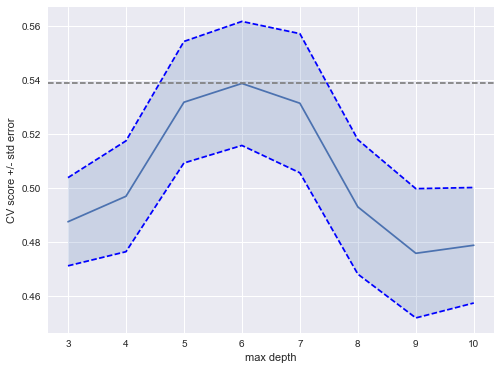

In [55]:
decision_tree_graph(X_mat, Y_mat, 3, 11)

In [ ]:
estimator = DecisionTreeRegressor(max_depth=6)
rfecv = RFECV(estimator=estimator, step=1, cv=5)
rfecv.fit(X_mat, Y_mat)
print("Optimal number of features : %d" % rfecv.n_features_)

In [ ]:
test = pd.DataFrame()
test['column'] = selected_features[0:len(selected_features)]
test['mask'] = rfecv.support_
test['ranking'] = rfecv.ranking_
test.sort_values('ranking', ascending=False).to_csv('tree_based_selection_second.csv')

#### * KBest 30개

In [ ]:
decision_tree_graph(X_kbest_30, Y_mat)

#### * KBest 20개

In [ ]:
decision_tree_graph(X_kbest_20, Y_mat)

#### * KBest 15개

In [ ]:
decision_tree_graph(X_kbest_15, Y_mat)

#### * KBest 10개

In [ ]:
decision_tree_graph(X_kbest_10, Y_mat)

In [ ]:
decision_tree = DecisionTreeRegressor(max_depth=6)
scores = cross_val_score(estimator=decision_tree, X=X_mat, y=Y_mat, cv=n_folds)
print 'CV accuracy:  %.3f +/- %.3f' % (np.mean(scores), np.std(scores))

In [ ]:
from sklearn import tree
decision_tree.fit(X_mat, Y_mat)
tree.export_graphviz(decision_tree,
out_file='tree.dot')       
importances = decision_tree.feature_importances_

In [ ]:
importances

In [ ]:
predict = decision_tree.predict(X_mat)
predict = np.round(predict)
result = pd.DataFrame({'predict': predict, 'Y': Y_mat})
result['predict'] = result['predict'].apply('{0:.0f}'.format)
result.sort_values('Y').to_csv('decision_tree_train_predict.csv')

### Random Forest

In [ ]:
def random_forest(X, Y, start_depth=3, end_depth=17):
    scores = []
    scores_std = []
    depths = range(start_depth, end_depth)

    for i in range(start_depth, end_depth):
        regr_rf = RandomForestRegressor(max_depth=i, random_state=2)
        this_scores = cross_val_score(estimator=regr_rf, X=X, y=Y, cv=n_folds)
        scores.append(np.mean(this_scores))
        scores_std.append(np.std(this_scores))

    scores, scores_std = np.array(scores), np.array(scores_std)
    plt.figure().set_size_inches(8, 6)
    plt.plot(depths, scores)
    std_error = scores_std / np.sqrt(n_folds)
    plt.plot(depths, scores + std_error, 'b--')
    plt.plot(depths, scores - std_error, 'b--')
    plt.fill_between(depths, scores + std_error, scores - std_error, alpha=0.2)
    plt.ylabel('CV score +/- std error')
    plt.xlabel('max depth')
    plt.axhline(np.max(scores), linestyle='--', color='.5')
    plt.show()

#### * variable selection 전

In [ ]:
random_forest(X_mat, Y_mat)

#### * KBest 30개

In [ ]:
random_forest(X_kbest_30, Y_mat)

#### * KBest 20개

In [ ]:
random_forest(X_kbest_20, Y_mat)

#### * KBest 15개

In [ ]:
random_forest(X_kbest_15, Y_mat)

#### * KBest 10개

In [ ]:
random_forest(X_kbest_10, Y_mat)

In [ ]:
regr_rf = RandomForestRegressor(max_depth=13, random_state=2)
scores = cross_val_score(estimator=regr_rf, X=X_mat, y=Y_mat, cv=n_folds)
print 'CV accuracy:  %.3f +/- %.3f' % (np.mean(scores), np.std(scores))

In [ ]:
regr_rf.fit(X_mat, Y_mat)
regr_rf.feature_importances_ 

In [ ]:
predict = regr_rf.predict(X_mat)
predict = np.round(predict)
result = pd.DataFrame({'predict': predict, 'Y': Y_mat})
result['predict'] = result['predict'].apply('{0:.0f}'.format)

In [ ]:
result.to_csv('random_forest.csv')

### Neural network

In [ ]:
X = X_mat
nn = neural_network.MLPRegressor(hidden_layer_sizes=50, solver='lbfgs', learning_rate='adaptive')
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
scores = cross_val_score(estimator=nn, X=X, y=Y_mat, cv=n_folds)

In [ ]:
print 'CV accuracy:  %.3f +/- %.3f' % (np.mean(scores), np.std(scores))

In [ ]:
nn.fit(X_mat, Y_mat)
predict = nn.predict(X_mat)
predict = np.round(predict)
result = pd.DataFrame({'predict': predict, 'Y': Y_mat})
result['predict'] = result['predict'].apply('{0:.0f}'.format)

In [ ]:
result

In [ ]:
df_fit_X.head()

In [ ]:
test = pd.read_csv('test.csv')
test.shape

In [ ]:
# test = test.merge(sub_area_code, left_on='sub_area', right_on='sub_area', how='inner')
# test = test.merge(ecology_code, left_on='ecology', right_on='ecology', how='inner')
# test['product_type'] = test['product_type'].eq('OwnerOccupier').mul(1)
# test.shape

In [ ]:
# test['cafe_count_calibration'] = test['cafe_count_500'] * distance_ratio['500'] + \
# test['cafe_count_1000'] * distance_ratio['1000'] + \
# test['cafe_count_1500'] * distance_ratio['1500'] + \
# test['cafe_count_2000'] * distance_ratio['2000'] + \
# test['cafe_count_3000'] * distance_ratio['3000'] + \
# test['cafe_count_5000'] * distance_ratio['5000']
# test['office_count_calibration'] = test['office_count_500'] * distance_ratio['500'] + \
# test['office_count_1000'] * distance_ratio['1000'] + \
# test['office_count_1500'] * distance_ratio['1500'] + \
# test['office_count_2000'] * distance_ratio['2000'] + \
# test['office_count_3000'] * distance_ratio['3000'] + \
# test['office_count_5000'] * distance_ratio['5000']
# test['trc_count_calibration'] = test['trc_count_500'] * distance_ratio['500'] + \
# test['trc_count_1000'] * distance_ratio['1000'] + \
# test['trc_count_1500'] * distance_ratio['1500'] + \
# test['trc_count_2000'] * distance_ratio['2000'] + \
# test['trc_count_3000'] * distance_ratio['3000'] + \
# test['trc_count_5000'] * distance_ratio['5000']
# test['big_church_count_calibration'] = test['big_church_count_500'] * distance_ratio['500'] + \
# test['big_church_count_1000'] * distance_ratio['1000'] + \
# test['big_church_count_1500'] * distance_ratio['1500'] + \
# test['big_church_count_2000'] * distance_ratio['2000'] + \
# test['big_church_count_3000'] * distance_ratio['3000'] + \
# test['big_church_count_5000'] * distance_ratio['5000']
# test['church_count_calibration'] = test['church_count_500'] * distance_ratio['500'] + \
# test['church_count_1000'] * distance_ratio['1000'] + \
# test['church_count_1500'] * distance_ratio['1500'] + \
# test['church_count_2000'] * distance_ratio['2000'] + \
# test['church_count_3000'] * distance_ratio['3000'] + \
# test['church_count_5000'] * distance_ratio['5000']
# test['mosque_count_calibration'] = test['mosque_count_500'] * distance_ratio['500'] + \
# test['mosque_count_1000'] * distance_ratio['1000'] + \
# test['mosque_count_1500'] * distance_ratio['1500'] + \
# test['mosque_count_2000'] * distance_ratio['2000'] + \
# test['mosque_count_3000'] * distance_ratio['3000'] + \
# test['mosque_count_5000'] * distance_ratio['5000']
# test['leisure_count_calibration'] = test['leisure_count_500'] * distance_ratio['500'] + \
# test['leisure_count_1000'] * distance_ratio['1000'] + \
# test['leisure_count_1500'] * distance_ratio['1500'] + \
# test['leisure_count_2000'] * distance_ratio['2000'] + \
# test['leisure_count_3000'] * distance_ratio['3000'] + \
# test['leisure_count_5000'] * distance_ratio['5000']
# test['sport_count_calibration'] = test['sport_count_500'] * distance_ratio['500'] + \
# test['sport_count_1000'] * distance_ratio['1000'] + \
# test['sport_count_1500'] * distance_ratio['1500'] + \
# test['sport_count_2000'] * distance_ratio['2000'] + \
# test['sport_count_3000'] * distance_ratio['3000'] + \
# test['sport_count_5000'] * distance_ratio['5000']
# test['market_count_calibration'] = test['market_count_500'] * distance_ratio['500'] + \
# test['market_count_1000'] * distance_ratio['1000'] + \
# test['market_count_1500'] * distance_ratio['1500'] + \
# test['market_count_2000'] * distance_ratio['2000'] + \
# test['market_count_3000'] * distance_ratio['3000'] + \
# test['market_count_5000'] * distance_ratio['5000']
# test['count_all'] = test['cafe_count_calibration'] + \
# test['office_count_calibration'] + test['trc_count_calibration'] + \
# test['big_church_count_calibration'] + test['church_count_calibration'] + \
# test['mosque_count_calibration'] + test['leisure_count_calibration'] + \
# test['sport_count_calibration'] + test['market_count_calibration']

In [ ]:
selected_features = [
    'num_room',
'full_sq',
# 'sport_count_5000',
'trc_count_5000',
'office_sqm_5000',
'trc_sqm_5000',
'sport_objects_raion',
'cafe_count_5000_price_1000',
# 'cafe_count_calibration',
# 'count_all',
'office_count_5000',
'metro_min_avto',
'big_church_km',
'office_km',
'nuclear_reactor_km',
'ttk_km',
'zd_vokzaly_avto_km'
]
X_mat_test = test[selected_features].as_matrix()

In [ ]:
# temp = test[selected_features]
# temp[temp['kremlin_km'].isnull()]
X_mat_test.shape

In [ ]:
# predict = regr_rf.predict(X_mat_test)
predict = nn.predict(X_mat_test)

In [ ]:
predict

In [ ]:
result = pd.DataFrame()
result['id'] = test['id']
result['price_doc'] = predict
result
result.to_csv('result.csv', header=True, index=False)